In [1]:
#Generate an array representing the sampled time
#𝑡[𝑛]={0,𝑇,2𝑇,3𝑇,4𝑇,...𝑛𝑇}
#Where 𝑇 is the sampling period. The array should represent the time 
#between 0 and 2 seconds sampled at 1600Hz.

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#sample frequency
freq = 1600
t = np.linspace(0,2,2*freq)
print(t.shape)
print(t)

(3200,)
[0.00000000e+00 6.25195374e-04 1.25039075e-03 ... 1.99874961e+00
 1.99937480e+00 2.00000000e+00]


In [3]:
#sampled time signal
x = 4+2*np.sin(2*np.pi*100*t)
print(x.shape)
print(x)

(3200,)
[4.         4.76559368 5.41456073 ... 2.58543927 3.23440632 4.        ]


In [12]:
#plotting time signal
plt.figure()

plt.plot(t, x)
plt.xlim([0, 0.05])
plt.title('Sampled time signal of 4+2*sin(2*pi*100*t)')
plt.xlabel('time (s)')
plt.ylabel('x(t)')

Text(0, 0.5, 'x(t)')

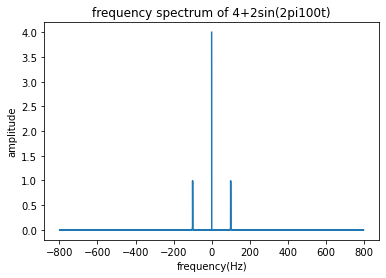

In [14]:
#Now we will analyse discrete-time signals in the frequency domain. 
#The Fourier transform will transform our time-domain signal into 
#the frequency-domain. An efficient implementation of this Fourier 
#transform is called the Fast Fourier Transform (FFT)
T = 1.0/freq

spec = np.fft.fft(x)
N = len(spec)
spec = spec/N

xf = np.fft.fftfreq(N, T)

plt.plot(xf, np.abs(spec))
plt.title('frequency spectrum of 4+2sin(2pi100t)')
plt.xlabel('frequency(Hz)')
plt.ylabel('amplitude')
plt.show()

In [6]:
#the same goes for 2sin(2pi100t) + 5cos(2pi1200t)

z = 2*np.sin(2*np.pi*100*t) + 5*np.cos(2*np.pi*1200*t)
print(z)

#plotting time signal
plt.figure()
plt.plot(t, z)
plt.xlim([0, 0.05])
plt.xlabel('time (s)')
plt.ylabel('x(t)')

[ 5.          0.77295909 -3.58541757 ... -6.41453903 -0.75822828
  5.        ]


Text(0, 0.5, 'x(t)')

In [16]:
#two sided frequency signal
T = 1.0/freq

spec = np.fft.fft(z)
N = len(spec)
spec = spec/N

zf = np.fft.fftfreq(N, T)

plt.plot(zf, np.abs(spec))
plt.title('frequency spectrum of 2sin(2pi100t)+5cos(2pi1200t)')
plt.xlabel('frequency(Hz)')
plt.ylabel('amplitude')
plt.show()

In [8]:
from scipy import signal
#50 hertz square wave with +2 and -2 V
#sampling with nyquist theorem
freq1 = 1000
t1 = np.linspace(0,1,freq1,True)
print(t1.shape)

(1000,)


In [9]:
#time signal
y = 2*np.sin(np.pi*50*t1)
square_y = 2*signal.square(y)
print(y.shape)

(1000,)


In [10]:
#plotting time signal
plt.figure()

plt.plot(t1, square_y)
plt.ylim(-3,3)
plt.xlim([0, 0.075])
plt.title('time signal 50Hz')
plt.xlabel('time (s)')
plt.ylabel('y(t)')

Text(0, 0.5, 'y(t)')

<function matplotlib.pyplot.show(*args, **kw)>

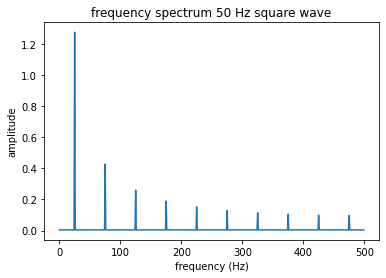

In [17]:
#one-sided frequency signal
T = 1.0/freq1

spec = np.fft.fft(square_y)
N = len(spec)
spec = spec/N

yf = np.fft.fftfreq(N, T)[:N//2]

plt.plot(yf, np.abs(spec[:N//2]))
plt.title('frequency spectrum 50 Hz square wave')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.show